In [1]:
import pandas as pd
from fuzzyset import FuzzySet
from xml.sax.saxutils import unescape

In [2]:
infile = '../data/full_02_14_2020/all_keywords_threshold_250_1.5_10000.jsonl'

In [3]:
df = pd.read_json(infile, orient='records', lines=True)

In [32]:
df[df['keyword_list'].apply(lambda x: 's atmospheres' in x)]

,stem,rake_score_mean,doc_id_count,doc_id_list,keyword_list,1996_sum,1997_sum,1998_sum,1999_sum,2000_sum,2001_sum,2002_sum,2003_sum,2004_sum,2005_sum,2006_sum,2007_sum,2008_sum,2009_sum
3239,s atmospher,4.293403,5141,"[333.0, 929.0, 1742.0, 3004.0, 3547.0, 3984.0,...","[s atmospheres, s atmosphere, s atmospheric]",257,228,244,254,248,273,424,382,484,405,553,430,499,460


In [6]:
kwd_fuzz = FuzzySet(df['keyword_list'].explode())

# Xml clean example

In [7]:
import re

t = unescape("""Then, we calculate the luminosity contributed from the disk a
nd corona and the coronal flux-weighted Compton y-parameter. It is found that at
low luminosity (L&lt;0.1L<SUB>Edd</SUB>) the spectrum is hard, with a spectral in
dex of α<SUB>sp</SUB>~1 (f<SUB>ν</SUB>~ν<SUP>-α<SUB>sp</SUB></SUP>), while at hig
h luminosity (L&gt;~0.1L<SUB>Edd</SUB>) the spectrum can be either soft or hard.
We also find that the situation is almost the same for supermassive and stellar m
ass black holes. These features are consistent with observations of AGNs and GBHC
s.""")
print(t)
print(re.sub('<[^<]+>', "", t))

Then, we calculate the luminosity contributed from the disk a
nd corona and the coronal flux-weighted Compton y-parameter. It is found that at
low luminosity (L<0.1L<SUB>Edd</SUB>) the spectrum is hard, with a spectral in
dex of α<SUB>sp</SUB>~1 (f<SUB>ν</SUB>~ν<SUP>-α<SUB>sp</SUB></SUP>), while at hig
h luminosity (L>~0.1L<SUB>Edd</SUB>) the spectrum can be either soft or hard.
We also find that the situation is almost the same for supermassive and stellar m
ass black holes. These features are consistent with observations of AGNs and GBHC
s.
Then, we calculate the luminosity contributed from the disk a
nd corona and the coronal flux-weighted Compton y-parameter. It is found that at
low luminosity (L<0.1LEdd) the spectrum is hard, with a spectral in
dex of αsp~1 (fν~ν-αsp~0.1LEdd) the spectrum can be either soft or hard.
We also find that the situation is almost the same for supermassive and stellar m
ass black holes. These features are consistent with observations of AGNs and GBHC
s.


# frequencies

In [8]:
import matplotlib.pyplot as plt

In [24]:
l = 100
r = 200

In [25]:
sdf = df.sort_values('doc_id_count', ascending=False)

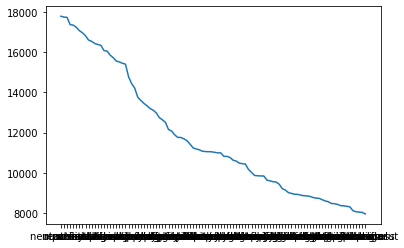

In [26]:
plt.plot(sdf['stem'].iloc[l:r], sdf['doc_id_count'].iloc[l:r])

In [27]:
sdf[l:r]

,stem,rake_score_mean,doc_id_count,doc_id_list,keyword_list,1996_sum,1997_sum,1998_sum,1999_sum,2000_sum,2001_sum,2002_sum,2003_sum,2004_sum,2005_sum,2006_sum,2007_sum,2008_sum,2009_sum
1157,neutron star,4.735642,17782,"[21.0, 96.0, 96.0, 137.0, 137.0, 230.0, 242.0,...","[neutron stars, neutron star]",896,846,1125,1058,1148,1337,1362,1193,1431,1380,1558,1456,1727,1265
6278,reaction,1.516583,17741,"[11.0, 11.0, 36.0, 48.0, 130.0, 407.0, 407.0, ...","[reaction, reactions]",821,1004,992,906,1027,1260,1308,1360,1370,1524,1761,1331,1727,1350
6037,pulsar,1.697613,17726,"[30.0, 30.0, 242.0, 242.0, 251.0, 251.0, 369.0...","[pulsars, pulsar]",970,953,1071,978,1208,1189,1197,1185,1514,1422,1648,1380,1728,1283
6228,array,1.540858,17363,"[246.0, 246.0, 266.0, 594.0, 704.0, 858.0, 998...","[arraying, arrayed, arrays, array]",697,752,1050,1040,1147,1072,1283,1513,1734,1400,1518,1014,1824,1319
6271,stream,1.520068,17341,"[169.0, 169.0, 475.0, 475.0, 539.0, 754.0, 754...","[streams, streaming, streamed, stream]",842,762,870,971,876,1202,1400,1161,1501,1315,1627,1419,1842,1553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,physical process,4.131692,8111,"[178.0, 178.0, 305.0, 305.0, 503.0, 503.0, 510...","[physical processe, physical processes, physic...",279,336,324,369,458,543,599,648,728,669,794,744,833,787
2777,s data,4.357486,8059,"[7.0, 420.0, 477.0, 813.0, 834.0, 946.0, 966.0...",[s data],276,405,425,408,470,516,607,605,734,558,849,670,807,729
5585,good agr,3.999471,8041,"[130.0, 183.0, 219.0, 230.0, 311.0, 326.0, 517...","[good agreement, good agrement, good agreements]",354,455,503,516,451,543,576,612,693,569,731,659,719,660
2557,spatial resolut,4.388289,8026,"[25.0, 42.0, 305.0, 429.0, 475.0, 998.0, 998.0...","[spatial resolutions, spatial resolution]",352,435,414,486,474,505,623,606,797,568,710,679,734,643
